# PLANT DISEASE PREDICTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, RandomFlip, RandomRotation, RandomZoom
from sklearn.metrics import confusion_matrix, classification_report
import os

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
img_height = 224
img_width = 224
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/drive/MyDrive/colab dataset/plant/Plant_disease_by_disease",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/drive/MyDrive/colab dataset/plant/Plant_disease_by_disease",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)


class_names = train_ds.class_names
print("Class Names (Diseases):", class_names)


Found 1612 files belonging to 9 classes.
Found 1612 files belonging to 9 classes.
Class Names (Diseases): ['Bacterial leaf blight', 'Blight', 'Brown spot', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy', 'Leaf smut', 'septoria', 'stripe_rust']


In [3]:
augmentation_model = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.2),
    RandomZoom(0.2)
])

train_ds = train_ds.map(lambda x, y: (augmentation_model(x, training=True), y))

In [4]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu', input_shape=(img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(len(class_names), activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,467,689 (9.41 MB)

 Trainable params: 2,467,593 (9.41 MB)

 Non-trainable params: 96 (384.00 B)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [6]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds, verbose=1)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 491s 9s/step - accuracy: 0.3856 - loss: 1.7578 - val_accuracy: 0.2525 - val_loss: 3.7366
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 30s 576ms/step - accuracy: 0.6908 - loss: 0.8069 - val_accuracy: 0.4349 - val_loss: 1.7012
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 568ms/step - accuracy: 0.7487 - loss: 0.6386 - val_accuracy: 0.5440 - val_loss: 1.4078
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 576ms/step - accuracy: 0.7757 - loss: 0.5554 - val_accuracy: 0.8213 - val_loss: 0.5118
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 569ms/step - accuracy: 0.7853 - loss: 0.5439 - val_accuracy: 0.8027 - val_loss: 0.4254
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 34s 662ms/step - accuracy: 0.8568 - loss: 0.3422 - val_accuracy: 0.8033 - val_loss: 0.6667
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 40s 644ms/step - accuracy: 0.8277 - loss: 0.4681 - val_accuracy: 0.8009 - val_loss: 0.4783
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 37s 570ms/step - accuracy: 0.8429 - loss: 0.3878 - val_accura

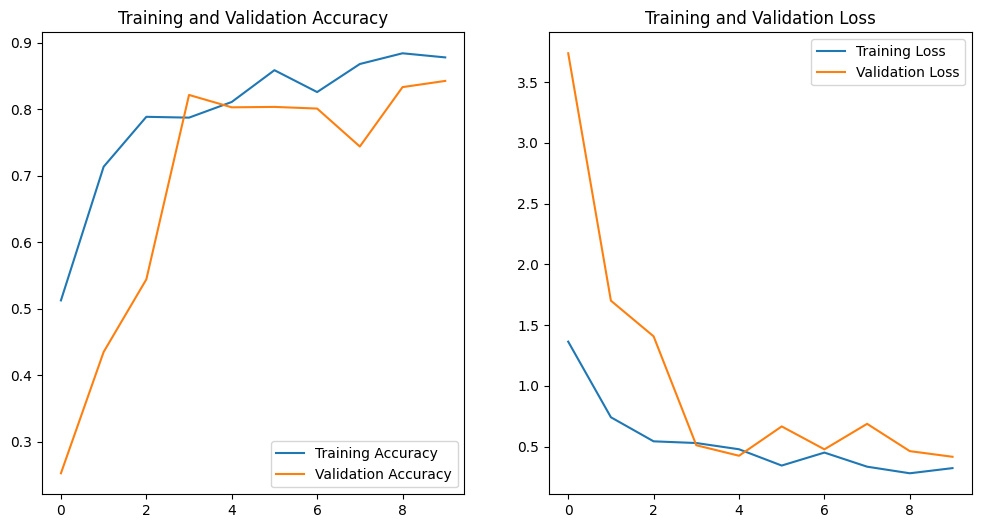

In [7]:
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_metrics(history)

In [8]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.8413 - loss: 0.3883
Validation Loss: 0.416967511177063
Validation Accuracy: 0.8424317836761475


In [9]:
model.save('plant_disease14.h5')


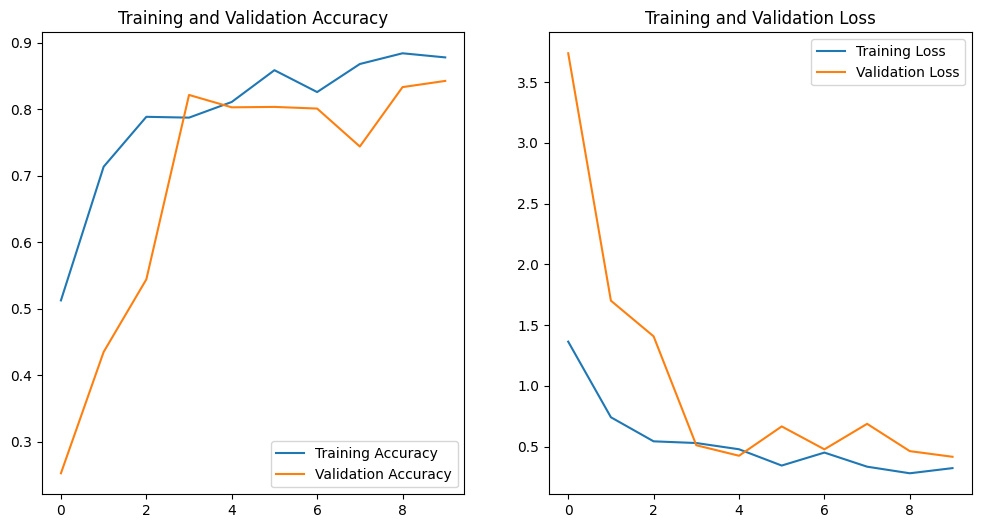

In [10]:
plot_metrics(history)

In [11]:
def predict_image(image_path, binary_model, disease_model, class_names, img_height, img_width):
    # Preprocess the image
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    # Step 1: Check if the image is valid
    binary_prediction = binary_model.predict(img_array)
    if binary_prediction[0][0] < 0.5:  # Threshold for rejecting invalid images
        return "No prediction: Image not from the target directory."

    # Step 2: Predict the disease if the image is valid
    disease_prediction = disease_model.predict(img_array)
    predicted_class = class_names[np.argmax(disease_prediction)]
    confidence = np.max(disease_prediction) * 100

    return f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}%"


In [12]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8367 - loss: 0.3930
Validation Loss: 0.41696757078170776
Validation Accuracy: 0.8424317836761475


In [13]:
fertilizer_recommendations = {
    'stripe_rust': 'Use a nitrogen-rich fertilizer (e.g., Urea) to promote growth.',
    'Healthy': 'Regular balanced fertilizer (e.g., NPK 10-10-10) is recommended.',
    'septoria': 'Use a potassium-rich fertilizer to enhance plant resilience.',

    'Brown spot': 'Apply a balanced fertilizer with micronutrients.',
    'Leaf smut': 'Use a nitrogen-phosphorus-potassium (NPK) fertilizer to boost recovery.',
    'Bacterial leaf blight': 'Use organic fertilizers like compost to improve soil health.',

    'Gray_Leaf_Spot': 'Apply a fertilizer high in potassium for improved disease resistance.',
    'common_rust': 'Use a balanced NPK fertilizer to maintain overall plant health.',
    'blight': 'Organic fertilizers and compost to enhance soil quality are recommended.',

    'Healthy': 'Regular balanced fertilizer (e.g., NPK 10-10-10) is recommended for all types.'
}


In [21]:
def predict_single_image_with_fertilizer(
    binary_model, disease_model, img_path, img_height, img_width, class_names, fertilizer_recommendations
):
    """
    Predicts the class of the plant image and provides fertilizer recommendations if valid.
    Returns 'Null' if the image does not belong to the expected directory.
    """
    try:
        # Load and preprocess the image
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

        # Step 1: Validate the image with the binary model
        binary_prediction = binary_model.predict(img_array)
        if binary_prediction[0][0] < 0.5:  # Threshold to reject invalid images
            return "Null: Image not from the target directory."

        # Step 2: Predict the disease class
        disease_predictions = disease_model.predict(img_array)
        score = tf.nn.softmax(disease_predictions[0])
        predicted_class = class_names[np.argmax(score)]

        # Step 3: Fetch fertilizer recommendation
        fertilizer_advice = fertilizer_recommendations.get(predicted_class, "No recommendation available.")

        # Construct the result
        result = (
            f"Predicted class: {predicted_class}\n"
            f"Confidence: {100 * np.max(score):.2f}%\n"
            f"Fertilizer Recommendation: {fertilizer_advice}"
        )
        return result

    except Exception as e:
        return f"Error processing the image: {str(e)}"

# Example usage
image_path = "/content/research doc.jpg"
result = predict_single_image_with_fertilizer(
    binary_model=model,  # Model to validate the image directory
    disease_model=model,       # Plant disease classification model
    img_path=image_path,
    img_height=img_height,
    img_width=img_width,
    class_names=class_names,
    fertilizer_recommendations=fertilizer_recommendations,
)

print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Null: Image not from the target directory.


In [22]:
def predict_single_image_with_fertilizer(
    binary_model, disease_model, img_path, img_height, img_width, class_names, fertilizer_recommendations
):
    """
    Predicts the class of the plant image and provides fertilizer recommendations if valid.
    Returns 'Null' if the image does not belong to the expected directory.
    """
    try:
        # Load and preprocess the image
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

        # Step 1: Validate the image with the binary model
        binary_prediction = binary_model.predict(img_array)
        if binary_prediction[0][0] < 0.5:  # Threshold to reject invalid images
            return "Null: Image not from the target directory."

        # Step 2: Predict the disease class
        disease_predictions = disease_model.predict(img_array)
        score = tf.nn.softmax(disease_predictions[0])
        predicted_class = class_names[np.argmax(score)]

        # Step 3: Fetch fertilizer recommendation
        fertilizer_advice = fertilizer_recommendations.get(predicted_class, "No recommendation available.")

        # Construct the result
        result = (
            f"Predicted class: {predicted_class}\n"
            f"Confidence: {100 * np.max(score):.2f}%\n"
            f"Fertilizer Recommendation: {fertilizer_advice}"
        )
        return result

    except Exception as e:
        return f"Error processing the image: {str(e)}"

# Example usage
image_path = "/content/drive/MyDrive/colab dataset/plant/Plant_disease_by_disease/Bacterial leaf blight/Rice_Bacterial_leaf_blight_10.JPG"
result = predict_single_image_with_fertilizer(
    binary_model=model,  # Model to validate the image directory
    disease_model=model,       # Plant disease classification model
    img_path=image_path,
    img_height=img_height,
    img_width=img_width,
    class_names=class_names,
    fertilizer_recommendations=fertilizer_recommendations,
)

print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: Bacterial leaf blight
Confidence: 21.91%
Fertilizer Recommendation: Use organic fertilizers like compost to improve soil health.
